# Compare charcoal results when the database is GTDB reps vs. GTDB full

This notebook analyzes the output of charcoal for the same set of genomes when the database is either GTDB reps or GTDB full. It looks at 12,921 genomes from 483 orders from GTDB full.

In [1]:
setwd("..")

In [2]:
# change default figure size
options(repr.plot.width=15, repr.plot.height=7)
# disable scientific notation (for plot axes)
options(scipen = 999)

In [4]:
library(dplyr)
library(janitor)
library(purrr)
library(readr)
library(ggplot2)
library(tidyr)
library(ggpubr)
library(jsonlite)
library(tibble)
library(stringr)

# source("~/github/2022-microberna/scripts/utils.R")

## Functions

In [5]:
read_contigs_tax <- function(contigs_tax_path){  
  json <- fromJSON(contigs_tax_path)
  contig_tax_all <- data.frame()
  for(i in 1:length(json)){
    contig_name <- names(json)[i]
    basepairs <- json[[i]][[1]]
    hashes <- json[[i]][[2]]
    if(length(json[[i]][[3]]) > 0){
      lineage <- json[[i]][[3]][[1]][[1]][,2]
      lineage = paste(lineage, collapse = ";", sep = ";")
      matched_hashes <- json[[i]][[3]][[1]][[2]]
    } else {
      lineage = NA
      matched_hashes = NA
    }
    contig_tax <- data.frame(contig_name, basepairs, hashes, lineage, matched_hashes)
    contig_tax_all <- bind_rows(contig_tax_all, contig_tax)
  }
   contig_tax_all$genome <- gsub(".contigs-tax.json", "", basename(contigs_tax_path))
   return(contig_tax_all)
}

In [31]:
read_contam_summary <- function(contam_summary_path){
  json <- fromJSON(contam_summary_path)
  all_contam_summary <- data.frame()
  for(i in 1:length(json[[1]])){
    genome_taxonomy <- unlist(json[[1]][[i]][1])
    genome_taxonomy <- genome_taxonomy[5:8]
    genome_taxonomy <- paste(genome_taxonomy, collapse = ";")
    contig_taxonomy <- unlist(json[[1]][[i]][2])
    contig_taxonomy <- contig_taxonomy[5:8]
    contig_taxonomy <- paste(contig_taxonomy, collapse = ";")
    counts <- unlist(json[[1]][[i]][3])
    contam_summary <- data.frame(genome_taxonomy, contig_taxonomy, counts)
    all_contam_summary <- bind_rows(all_contam_summary, contam_summary)
  }
  return(all_contam_summary)
}

## read in charcoal results

In [6]:
charcoal_full <- read_csv("outputs/gtdb_rs202_charcoal1/stage1_hitlist.csv", show_col_types = F)
charcoal_reps <- read_csv("outputs/gtdb_rs202_charcoal1_reps/stage1_hitlist.csv", show_col_types = F)

In [7]:
head(charcoal_reps)

genome,filter_at,override_filter_at,total_bad_bp,superkingdom_bad_bp,phylum_bad_bp,class_bad_bp,order_bad_bp,family_bad_bp,genus_bad_bp,f_ident,f_major,lineage,comment
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GCA_012103455.1_genomic.fna.gz,order,NA,5922262,0,0,0,5922262,5922262,5922262,0.571,0.002,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__HK1,NA
GCF_000195295.1_genomic.fna.gz,order,NA,3282536,0,3282536,3282536,3282536,3282536,3282536,1.000,0.002,d__Bacteria;p__Desulfobacterota;c__Desulfobaccia;o__Desulfobaccales,NA
GCF_001870225.1_genomic.fna.gz,order,NA,3049282,0,0,0,3049282,3049282,3049282,0.600,0.002,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Gloeomargaritales,NA
GCF_902387115.1_genomic.fna.gz,order,NA,2759678,0,0,0,2759678,2759678,2759678,0.677,0.036,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales,NA
GCF_000237805.1_genomic.fna.gz,order,NA,1675934,0,1675934,1675934,1675934,1675934,1675934,1.000,0.002,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales,NA
GCA_001897525.1_genomic.fna.gz,order,NA,1211487,0,0,0,1211487,2157741,2157741,0.874,0.047,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales,NA


In [8]:
# join 
all <- left_join(charcoal_full, charcoal_reps, by = c("genome", "filter_at", "override_filter_at"))

In [9]:
head(all)

genome,filter_at,override_filter_at,total_bad_bp.x,superkingdom_bad_bp.x,phylum_bad_bp.x,class_bad_bp.x,order_bad_bp.x,family_bad_bp.x,genus_bad_bp.x,⋯,superkingdom_bad_bp.y,phylum_bad_bp.y,class_bad_bp.y,order_bad_bp.y,family_bad_bp.y,genus_bad_bp.y,f_ident.y,f_major.y,lineage.y,comment.y
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GCF_001870225.1_genomic.fna.gz,order,NA,3049282,0,0,0,3049282,3049282,3049282,⋯,0,0,0,3049282,3049282,3049282,0.600,0.002,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Gloeomargaritales,NA
GCA_012103325.1_genomic.fna.gz,order,NA,1704793,0,0,0,1704793,2772302,2772302,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
GCF_003318295.1_genomic.fna.gz,order,NA,932028,0,0,0,932028,932028,932028,⋯,0,0,0,932028,932028,932028,0.410,0.013,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales_G,NA
GCA_001897525.1_genomic.fna.gz,order,NA,930915,0,0,0,930915,2788654,2788654,⋯,0,0,0,1211487,2157741,2157741,0.874,0.047,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales,NA
GCA_900762445.1_genomic.fna.gz,order,NA,806201,0,806201,806201,806201,1137819,1137819,⋯,0,255570,255570,255570,587188,587188,0.543,0.022,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales,NA
GCF_900101835.1_genomic.fna.gz,order,NA,558474,0,558474,558474,558474,558474,558474,⋯,0,334873,334873,334873,334873,334873,0.552,0.015,d__Bacteria;p__Firmicutes_B;c__Peptococcia;o__Peptococcales,NA


## assess

In [10]:
# do the lineages agree?
table(all$lineage.x == all$lineage.y)

# note that lineage is NA for some of the genomes. 
# This occurrs when all genome hashes belong to one lineage, so then this is nothing for charocal to do
table(is.na(all$lineage.x))
table(is.na(all$lineage.y))


TRUE 
7885 


FALSE  TRUE 
 9499  3422 


FALSE  TRUE 
10263  2658 

In [11]:
# dig in to this NA portion -- what genomes is it different for?
complete_match_full_not_reps <-  all %>% 
  filter(is.na(lineage.x)) %>% # full match in GTDB full
  filter(!is.na(lineage.y))    # but not in GTDB reps

table(complete_match_full_not_reps$order_bad_bp.y)
# these correspond to explanation 2a below


   0 
2378 

In [12]:
# how diverse are the genomes that we're looking at -- are we looking at many different lineages?
length(unique(all$lineage.x))

[1] 483

## plot!

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation int

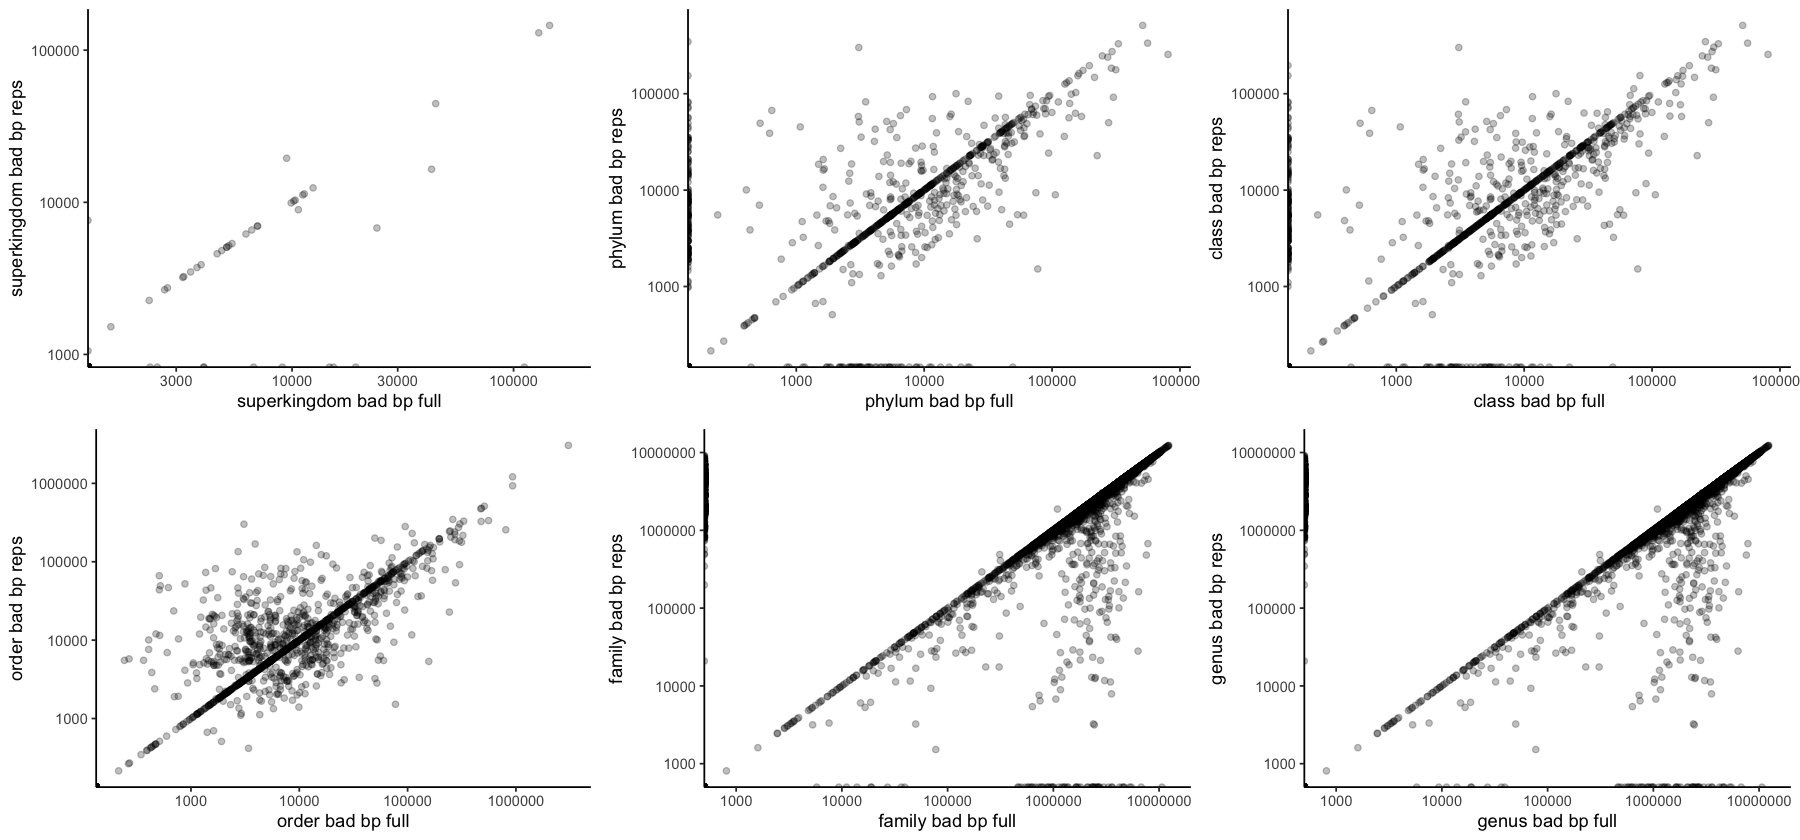

In [13]:
# plot the number of dirty base pairs at each level of taxonomy
superkingdom <- ggplot(all, aes(x = superkingdom_bad_bp.x, y = superkingdom_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "superkingdom bad bp full", y = "superkingdom bad bp reps")

phylum <- ggplot(all, aes(x = phylum_bad_bp.x, y = phylum_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "phylum bad bp full", y = "phylum bad bp reps")

class <- ggplot(all, aes(x = class_bad_bp.x, y = class_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "class bad bp full", y = "class bad bp reps")

order <- ggplot(all, aes(x = order_bad_bp.x, y = order_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "order bad bp full", y = "order bad bp reps")

family <- ggplot(all, aes(x = family_bad_bp.x, y = family_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "family bad bp full", y = "family bad bp reps")

genus <- ggplot(all, aes(x = genus_bad_bp.x, y = genus_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "genus bad bp full", y = "genus bad bp reps")

ggarrange(superkingdom, phylum, class, order, family, genus, nrow = 2, ncol = 3)

### Interpretting these plot

Each point represents a genomes.
If charcoal performs the same when using the full or reps db, then all points will fall on the diagonal (1:1 ratio, number of contaminant base pairs is the same).
Any point that falls off of this diagonal gives us a different result.

**Important artifacts/differences**

1. Genomes that fall below the diagonal are estimated to be more contaminated with the full database than with the reps database.
2. Genomes that fall above the diagonal are estimated to be more contaminated with the reps database than with the full datase.
3. Genomes that fall above the diagonal and on the Y axis are estimated to have contamination with the reps database and not have contamination with the full database.  
    a. Many genomes falling along the Y axis (e.g. a lot of contamination found when using the reps db, and none getting detected when using the full db) for the FAMILY and GENUS level plots  
    b. Many genomes falling along the Y axis (e.g. a lot of contamination found when using the reps db, and none getting detected when using the full db) for the PHYLUM and CLASS level plots  

**Reason behind the artifact/difference**

1. **Genomes that are estimated to be more contaminated with the full database than the reps database**:
When we have a bigger database, we can recover more of the hashes in a signature. This makes the biggest difference for small contigs, where with the reps database we don't match enough hashes to remove a contaminant contig, but with the full database we do. Charcoal requires a minimum of 3 hashes to match to remove a contig.

2. **Genomes that are estimated to be more contaminated with the reps database than the full database**:
Similar to the previous category, most of these discrepancies occur for short contigs, where the full database assigns them the same lineage as the genome, and the reps database assigns them as something else. It's hard to know what is the true reason for this occurring (shared base pairs across orders that are better represented in the full database?), and I think the take home message should be to be skeptical of short contigs. 

3a. **Genomes that fall along the Y axis for the FAMILY and GENUS level plots:**
+ When running with the full db, 3,422 genomes have the comment: `All genome hashes belong to one lineage! Nothing to do`
+ When running with the reps db, 204 genomes have the comment: `All genome hashes belong to one lineage! Nothing to do`
This is where these discrepancies are arising. 2377 genomes that were untouched with full were detected as contaminated at the sub-order level. In the full database, 100% of the hashes in the query are findable in other signatures from genomes that are the same order. In the reps database, 100% of the hashes are not findable. All that are occur at the correct order, but some are at a different family or genus level. These base pairs are then marked as contaminants, whereas they're ignored when running with the full database. We can ignore this artifact, as it does not change the level of contamination at the order level.

3b. **Genomes that fall along the Y axis for the PHYLUM and CLASS level plots:**
Almost all of the genomes that fall on the y axis for phylum are the same ones that fall on the y axis for class -- meaning the same genomes are causing problems. These ones are interesting because they have discrepancies that disappear when we look at the order level, but are there are the superkingdom or phylum level. What's happening is that, in general, the same contigs are being called as contaminants by either the rep or the full database, but the match ends up being different. Take for example `GCF_001427365.1` (lineage: d__Bacteria, p__Proteobacteria, c__Gammaproteobacteria, o__Xanthomonadales). This genome was contaminated at the superkingdom level when using the reps database, but the phylum level using the full database. However, both databases identifed a 1,056 base pair contig as the contaminant. In the full database, the match was (d__Bacteria, p__Actinobacteriota, c__Actinomycetia, o__Mycobacteriales; 4 hashes). In the reps database, the match was (d__Archaea, p__Halobacteriota, c__Halobacteria, o__Halobacteriales; 4 hashes). So in either case, the contig is a contaminant. I'm wondering if this is a situation where the real contaminant is something else, and it just occurs in two different signatures. This would probably be a good one to look at alignments for.


Warning message:
“Removed 2463 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2463 rows containing non-finite values (stat_bin).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 25 rows containing missing values (geom_bar).”


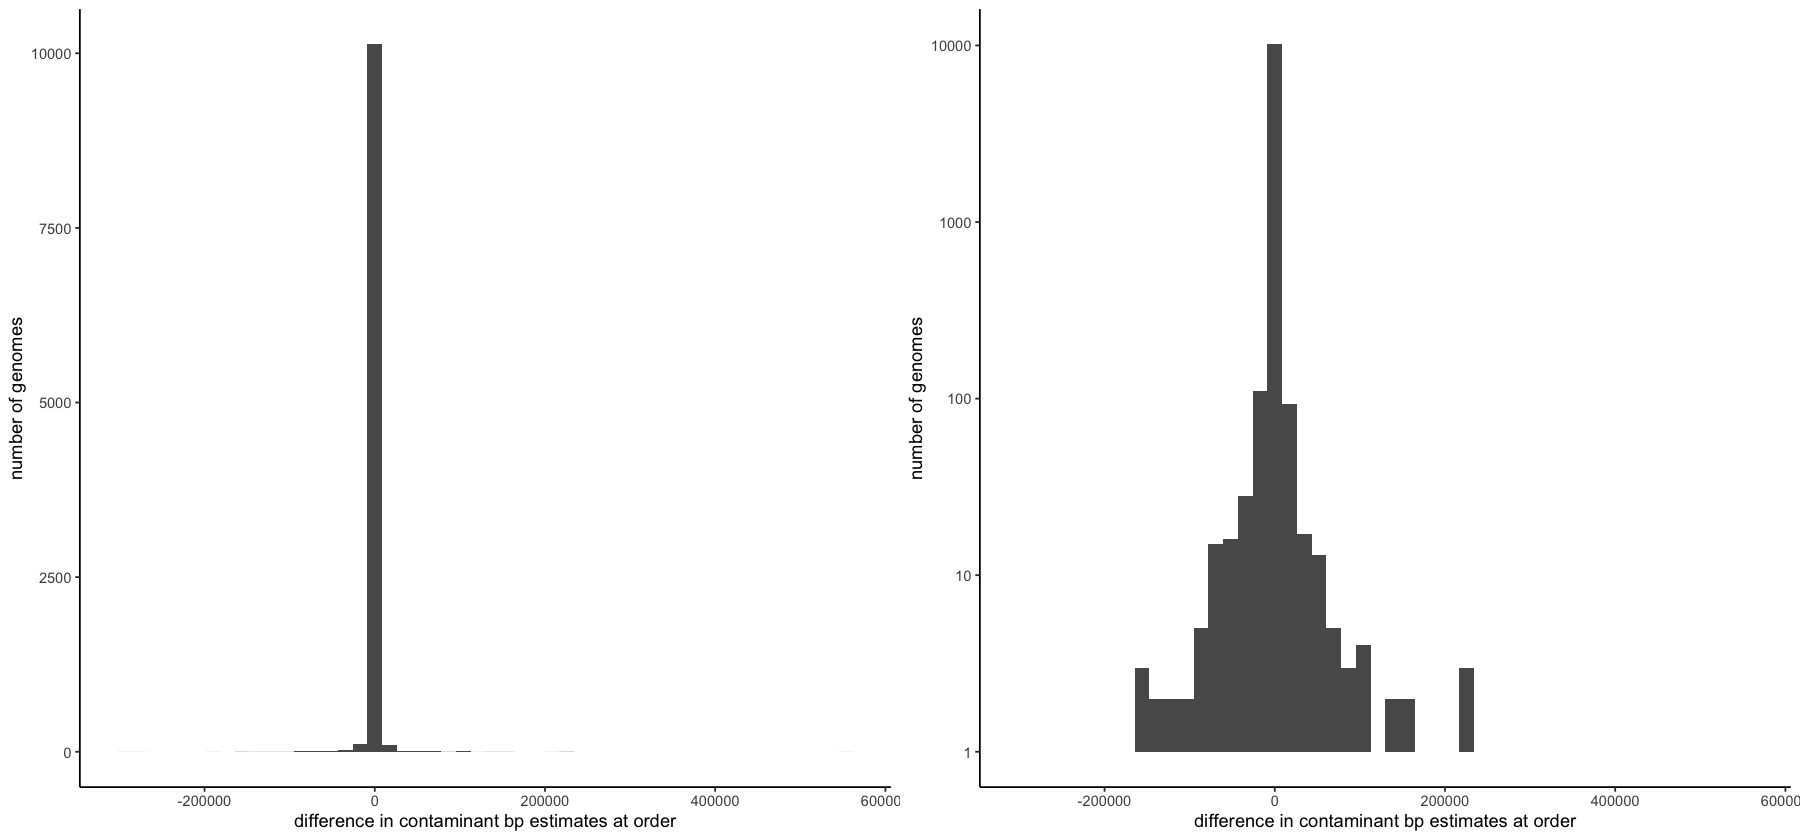

In [30]:
all <- all %>%
  mutate(order_diff_bp = order_bad_bp.x - order_bad_bp.y)

plt <- ggplot(all, aes(x = order_diff_bp)) +
  geom_histogram(bins = 50) +
  theme_classic() +
  labs(x = "difference in contaminant bp estimates at order", y = "number of genomes")

plt_log10 <- ggplot(all, aes(x = order_diff_bp)) +
  geom_histogram(bins = 50) +
  theme_classic() +
  scale_y_log10() +
  labs(x = "difference in contaminant bp estimates at order", y = "number of genomes")

ggarrange(plt, plt_log10)

In [14]:
# the diagonal sort of disappears above. 
# how often do the dirty bp estimates actually differ?
table(all$order_bad_bp.x == all$order_bad_bp.y)


FALSE  TRUE 
  713  9745 

In [15]:
# how often are the reps estimates larger than the full estimates?
table(all$order_bad_bp.x < all$order_bad_bp.y)


FALSE  TRUE 
10076   382 

In [16]:
# how often are the reps estimates larger than the full estimates?
table(all$family_bad_bp.x < all$family_bad_bp.y)


FALSE  TRUE 
 8067  2391 

In [17]:
# how often are the reps estimates larger than the full estimates?
table(all$class_bad_bp.x < all$class_bad_bp.y)


FALSE  TRUE 
10158   300 

In [18]:
# are the names for the genomes that differ at the class the same ones that differ at the order/family/genus?

more_at_class <- all$genome[all$class_bad_bp.x < all$class_bad_bp.y]
more_at_order <- all$genome[all$order_bad_bp.x < all$order_bad_bp.y]
more_at_family <- all$genome[all$family_bad_bp.x < all$family_bad_bp.y]
more_at_genus <- all$genome[all$family_bad_bp.x < all$family_bad_bp.y]

table(more_at_class %in% more_at_order)
table(more_at_class %in% more_at_family)
table(more_at_family %in% more_at_genus)


FALSE  TRUE 
   41  2722 


FALSE  TRUE 
  300  2463 


TRUE 
4854 

In [19]:
more_at_class <- more_at_class[!is.na(more_at_class)]

In [20]:
table(more_at_class %in% complete_match_full_not_reps$genome)
table(more_at_order %in% complete_match_full_not_reps$genome)
table(more_at_family %in% complete_match_full_not_reps$genome)
table(more_at_genus %in% complete_match_full_not_reps$genome)


FALSE 
  300 


FALSE 
 2845 


FALSE  TRUE 
 2477  2377 


FALSE  TRUE 
 2477  2377 

Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”


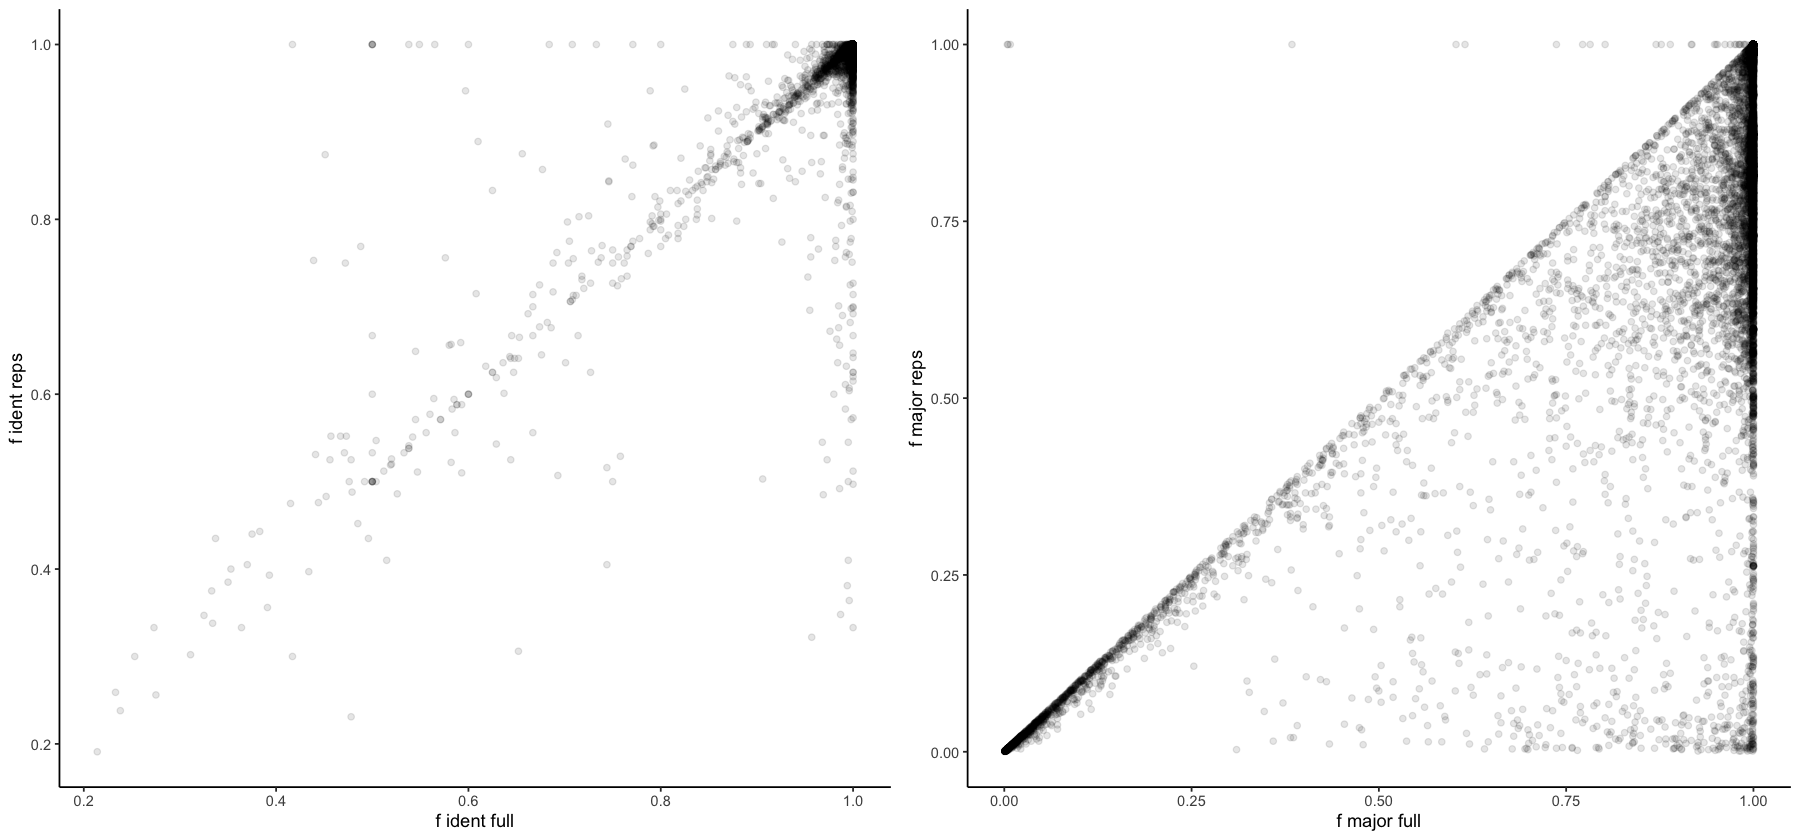

In [21]:
f_ident <- ggplot(all, aes(x = f_ident.x, y = f_ident.y)) +
  geom_point(alpha = .1) +
  theme_classic() +
  labs(x = "f ident full", y = "f ident reps")

f_major <- ggplot(all, aes(x = f_major.x, y = f_major.y)) +
  geom_point(alpha = .1) +
  theme_classic() +
  labs(x = "f major full", y = "f major reps")

ggarrange(f_ident, f_major)

The f_ident and f_major are the estimates for the fraction of the genome that was identifiable, and of that fraction, the fraction that was the major lineage.
Not surprisingly, the f_major is higher for the full database for many genomes — with a more complete database, we identify more of our genome of interest.
In the f_major graph, the dot that falls in the top left corner I think may be a case where charcoal failed silently -- I should probably look at what happened for that bit. I'm not sure what could have occurred for the other points that fall at the top of the graph.

## Genomes that are more contaminated in full than reps

331 genomes total

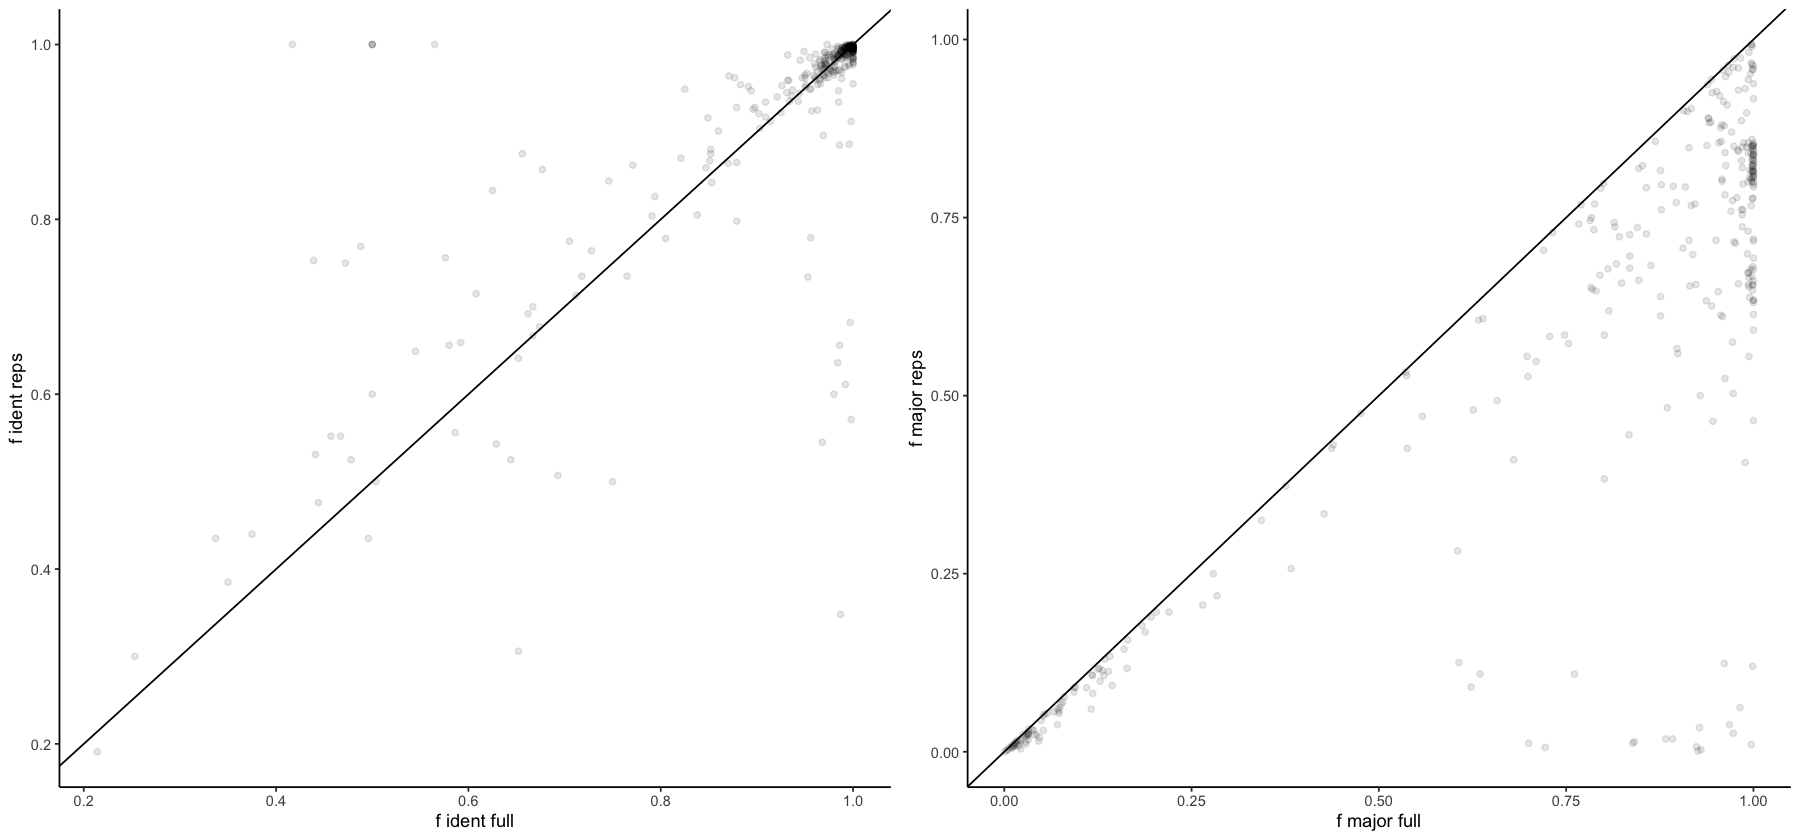

In [47]:
# for the genomes that are estimated to be more contaminated by the full database, is the f_ident and f_major higher?

plt1 <- all %>%
  filter(order_bad_bp.x > order_bad_bp.y) %>%
  ggplot(aes(x = f_ident.x, y = f_ident.y)) +
  geom_point(alpha = .1) +
  theme_classic() +
  labs(x = "f ident full", y = "f ident reps") +
  geom_abline(slope = 1, intercept = 0)

plt2 <- all %>%
  filter(order_bad_bp.x > order_bad_bp.y) %>%
  ggplot(aes(x = f_major.x, y = f_major.y)) +
  geom_point(alpha = .1) +
  theme_classic() +
  labs(x = "f major full", y = "f major reps") +
  geom_abline(slope = 1, intercept = 0)

ggarrange(plt1, plt2)

source,mean_f_ident,sd_f_ident
<chr>,<dbl>,<dbl>
full_database,0.9136073,0.1561411
reps_database,0.9172054,0.1475171


source,mean_f_major,sd_f_major
<chr>,<dbl>,<dbl>
full_database,0.7047190,0.3754784
reps_database,0.5382931,0.3409226


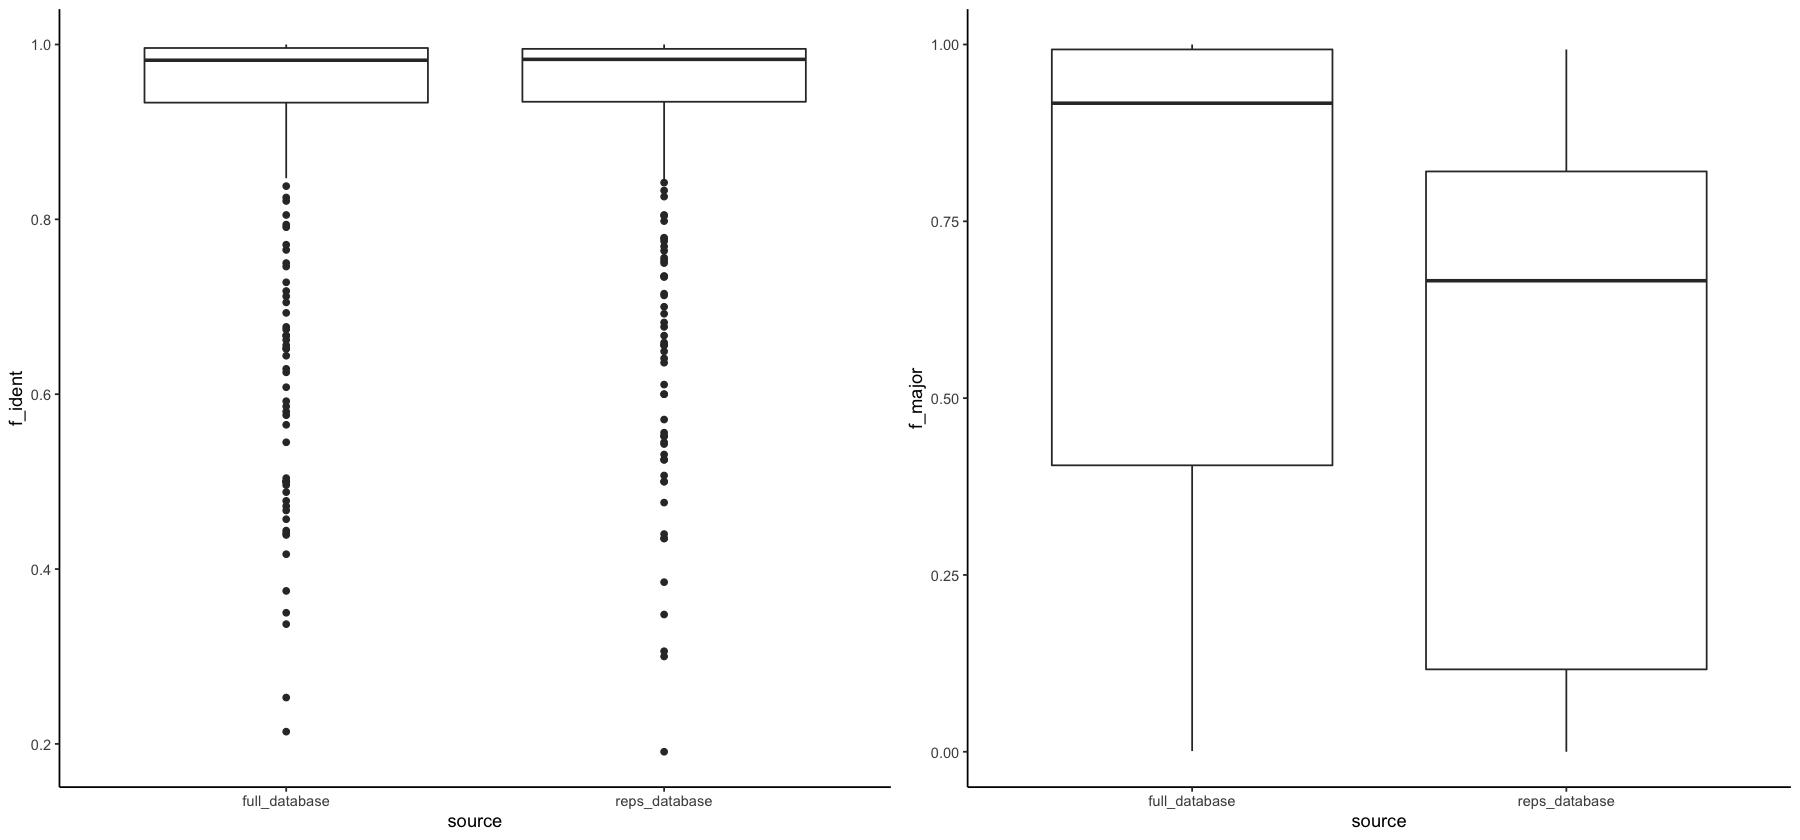

In [61]:
all %>%
  filter(order_bad_bp.x > order_bad_bp.y) %>%
  select(genome, full_database = f_ident.x, reps_database = f_ident.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_ident") %>%
  group_by(source) %>%
  summarize(mean_f_ident = mean(f_ident),
            sd_f_ident = sd(f_ident))

plt1 <- all %>%
  filter(order_bad_bp.x > order_bad_bp.y) %>%
  select(genome, full_database = f_ident.x, reps_database = f_ident.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_ident") %>%
  ggplot(aes(x = source, y = f_ident)) +
  geom_boxplot() +
  theme_classic()

all %>%
  filter(order_bad_bp.x > order_bad_bp.y) %>%
  select(genome, full_database = f_major.x, reps_database = f_major.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_major") %>%
  group_by(source) %>%
  summarize(mean_f_major = mean(f_major), 
            sd_f_major = sd(f_major))
plt2 <- all %>%
  filter(order_bad_bp.x > order_bad_bp.y) %>%
  select(genome, full_database = f_major.x, reps_database = f_major.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_major") %>%
  ggplot(aes(x = source, y = f_major)) +
  geom_boxplot() +
  theme_classic()

ggarrange(plt1, plt2)

**Question** Are there big differences in per-hash classifiability? (need to parse jsons and look at them I think...)

In [66]:
# investigate a specific genome at the contig level
full_contig <- read_contigs_tax("outputs/gtdb_rs202_charcoal1/stage1/GCA_002348235.1_genomic.fna.gz.contigs-tax.json")
rep_contig <- read_contigs_tax("outputs/gtdb_rs202_charcoal1_reps/stage1/GCA_002348235.1_genomic.fna.gz.contigs-tax.json")

In [78]:
contig_ex <- left_join(full_contig, rep_contig, by = c("genome", "contig_name", "basepairs", "hashes")) %>%
  select(genome, contig_name, basepairs, hashes,
         matched_hashes_full = matched_hashes.x, matched_hashes_reps = matched_hashes.y,
         lineage_full = lineage.x, lineage_reps = lineage.y) %>%
  arrange(matched_hashes_reps)

contig_ex

genome,contig_name,basepairs,hashes,matched_hashes_full,matched_hashes_reps,lineage_full,lineage_reps
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
GCA_002348235.1_genomic.fna.gz,"DEAQ01000030.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_130859, whole genome shotgun sequence",3381,2,1,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000084.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_136074, whole genome shotgun sequence",3246,1,1,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000019.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_147787, whole genome shotgun sequence",5232,4,2,1,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales
GCA_002348235.1_genomic.fna.gz,"DEAQ01000137.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_158732, whole genome shotgun sequence",6957,2,2,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000120.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_169788, whole genome shotgun sequence",2639,3,3,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000071.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_172050, whole genome shotgun sequence",2896,1,1,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000122.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_195754, whole genome shotgun sequence",3079,1,1,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000116.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_250340, whole genome shotgun sequence",2553,3,3,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA1151
GCA_002348235.1_genomic.fna.gz,"DEAQ01000017.1 MAG TPA_asm: Dehalococcoidia bacterium UBA2978 UBA2978_contig_84568, whole genome shotgun sequence",11787,7,7,1,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA2979,d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA2979


Warning message:
“Removed 48 rows containing missing values (geom_point).”


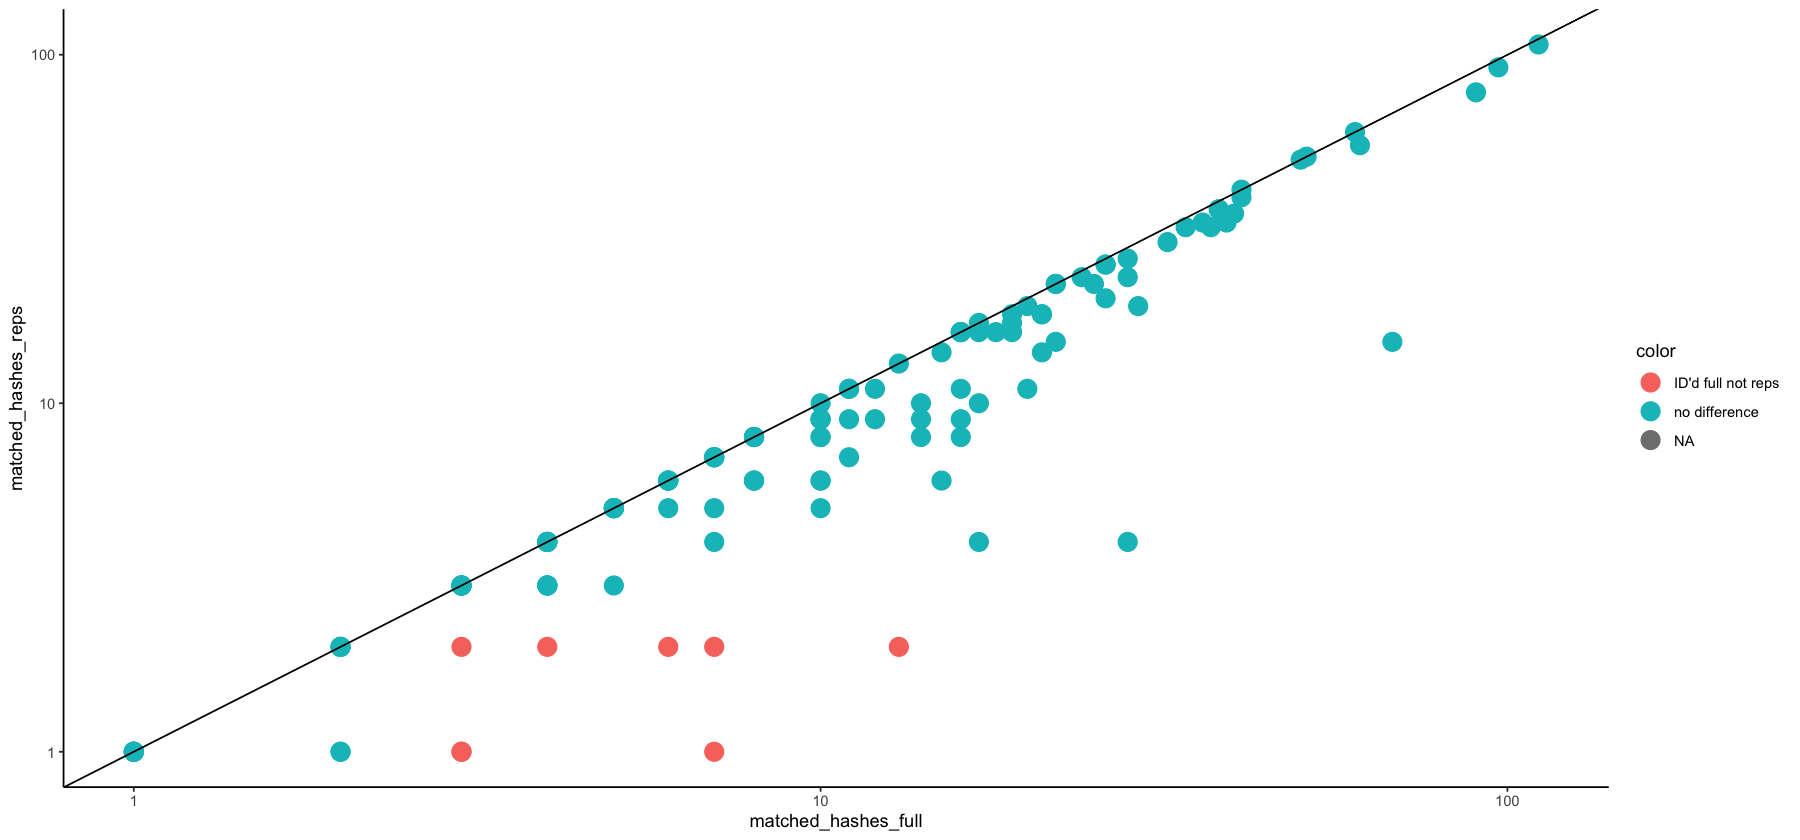

In [87]:
contig_ex <- contig_ex %>%
  mutate(color = ifelse(matched_hashes_reps < 3 & matched_hashes_full >=3, "ID'd full not reps", "no difference"))

ggplot(contig_ex, aes(x = matched_hashes_full, y = matched_hashes_reps, color = color)) +
  geom_point(size = 5) +
  theme_classic() +
  geom_abline(intercept = 0, slope = 1) +
  scale_y_log10() + scale_x_log10()

In [77]:
table(contig_ex$lineage_full == contig_ex$lineage_reps)


FALSE  TRUE 
    1   126 

## Genomes that are more contaminated in reps than full

382 genomes

source,mean_f_ident,sd_f_ident
<chr>,<dbl>,<dbl>
full_database,0.9832906,0.07460336
reps_database,0.9513586,0.11073377


source,mean_f_major,sd_f_major
<chr>,<dbl>,<dbl>
full_database,0.9274005,0.1916151
reps_database,0.6733351,0.2613305


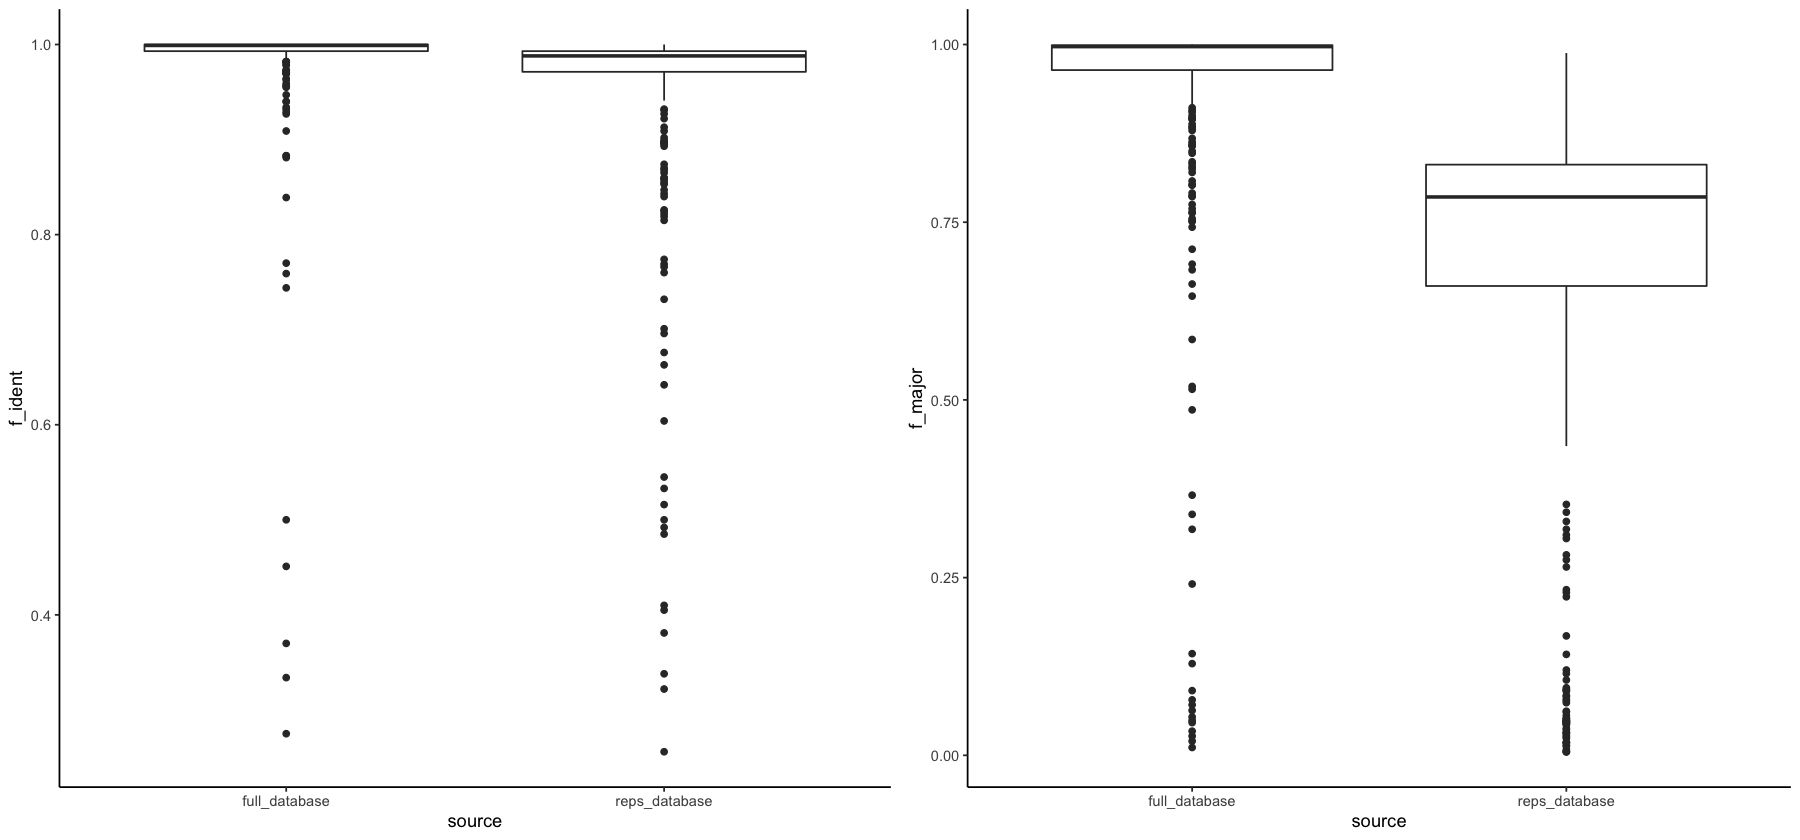

In [88]:
all %>%
  filter(order_bad_bp.x < order_bad_bp.y) %>%
  select(genome, full_database = f_ident.x, reps_database = f_ident.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_ident") %>%
  group_by(source) %>%
  summarize(mean_f_ident = mean(f_ident),
            sd_f_ident = sd(f_ident))

plt1 <- all %>%
  filter(order_bad_bp.x < order_bad_bp.y) %>%
  select(genome, full_database = f_ident.x, reps_database = f_ident.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_ident") %>%
  ggplot(aes(x = source, y = f_ident)) +
  geom_boxplot() +
  theme_classic()

all %>%
  filter(order_bad_bp.x < order_bad_bp.y) %>%
  select(genome, full_database = f_major.x, reps_database = f_major.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_major") %>%
  group_by(source) %>%
  summarize(mean_f_major = mean(f_major), 
            sd_f_major = sd(f_major))
plt2 <- all %>%
  filter(order_bad_bp.x < order_bad_bp.y) %>%
  select(genome, full_database = f_major.x, reps_database = f_major.y) %>%
  pivot_longer(cols = -genome, names_to = "source", values_to = "f_major") %>%
  ggplot(aes(x = source, y = f_major)) +
  geom_boxplot() +
  theme_classic()

ggarrange(plt1, plt2)

In [32]:
# investigate a specific genome at the contig level
full_contig <- read_contigs_tax("outputs/gtdb_rs202_charcoal1/stage1/GCA_903867785.1_genomic.fna.gz.contigs-tax.json")
rep_contig <- read_contigs_tax("outputs/gtdb_rs202_charcoal1_reps/stage1/GCA_903867785.1_genomic.fna.gz.contigs-tax.json")

In [33]:
contig_ex <- left_join(full_contig, rep_contig, by = c("genome", "contig_name", "basepairs", "hashes")) %>%
  select(genome, contig_name, basepairs, hashes,
         matched_hashes_full = matched_hashes.x, matched_hashes_reps = matched_hashes.y,
         lineage_full = lineage.x, lineage_reps = lineage.y) %>%
  arrange(matched_hashes_reps)

contig_ex

genome,contig_name,basepairs,hashes,matched_hashes_full,matched_hashes_reps,lineage_full,lineage_reps
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000067.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:067/549, whole genome shotgun sequence",1552,1,1,1,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000073.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:073/549, whole genome shotgun sequence",1589,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000075.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:075/549, whole genome shotgun sequence",1892,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000099.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:099/549, whole genome shotgun sequence",5288,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000102.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:102/549, whole genome shotgun sequence",3740,2,1,1,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Bryobacterales,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Bryobacterales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000111.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:111/549, whole genome shotgun sequence",3048,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000113.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:113/549, whole genome shotgun sequence",1629,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000125.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:125/549, whole genome shotgun sequence",2978,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000139.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:139/549, whole genome shotgun sequence",1886,1,1,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales


In [34]:
# looking at where the lineages don't match, we can see 3 contigs that would have been filtered from reps that were
# not filtered in from full
contig_ex %>% 
  filter(lineage_full != lineage_reps) %>% 
  select(-genome, -contig_name)

basepairs,hashes,matched_hashes_full,matched_hashes_reps,lineage_full,lineage_reps
<int>,<int>,<int>,<int>,<chr>,<chr>
4071,4,4,1,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales
4675,6,6,3,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales
3042,3,3,3,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales
1911,4,4,4,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales


In [37]:
# but we also see two contigs that were filtered from the full database that are not filtered with the reps database,
# which complicates accounting for differences in the number of contaminant basepairs at the order level
contig_ex %>% 
  filter(!is.na(lineage_full)) %>% 
  filter(is.na(lineage_reps)) %>%
  filter(!lineage_full %in% "d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales") %>%
  filter(matched_hashes_full >= 3)

genome,contig_name,basepairs,hashes,matched_hashes_full,matched_hashes_reps,lineage_full,lineage_reps
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000043.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:043/549, whole genome shotgun sequence",2011,4,4,NA,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales,NA
GCA_903867785.1_genomic.fna.gz,"CAIPSV010000508.1 uncultured Verrucomicrobia bacterium isolate Umea3p1_bin-0093 genome assembly, contig: bin-0093:508/549, whole genome shotgun sequence",5238,5,5,NA,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales,NA
